In [8]:
import numpy as np

from models import Mw
from funcs import value_it_fixedComp, value_it_stratComp ,plot_price_dev,plot_share_dev, simulate_mw_bertrand
from scipy.interpolate import interp1d #functional interpolation


## Compare policy and value functions between strategic and non-strategic setting

Compare being strategic, vs setting price = 1

In [9]:
### infinite horizon setup

# problem setup
n_points = 400
Beta = 0.95
Eta = 0.1
s_list = [ (1/(n_points))*(i+1) for i in range(0,n_points-1)]  #values for weights
p_list = [ (1/(n_points))*(i) for i in range(0,n_points+1)] #values for prices - allows the boundaries
#setup parameters for policy function
outside_price = 1
def outside_policy(x):
    return outside_price

In [10]:
### compute value and policy functions
res_fixed = value_it_fixedComp(s_list,p_list,
                         beta=Beta,
                         outsidePolicy=outside_price,
                         eta=0.1)


res_strat = value_it_stratComp(s_list,p_list,
                               beta=Beta,
                               eta=0.1)





converged successfully in 184 iterations
converged successfully in 178 iterations


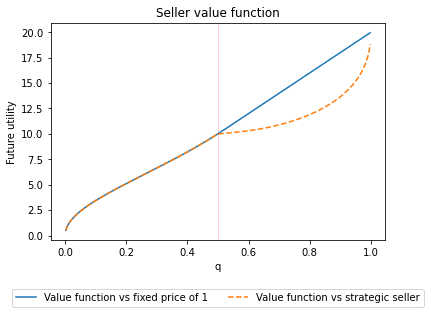

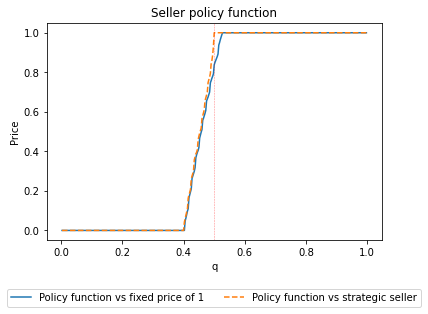

In [11]:
import matplotlib.pyplot as plt #plotting

### plot seller value function 
plt.plot(s_list,res_fixed['value_function'], label='Value function vs fixed price of 1')
plt.plot(s_list, res_strat['value_function'], label='Value function vs strategic seller', linestyle='--') # Add this line for values1
plt.axvline(x=0.5, color='red', linestyle='--',alpha=0.5,linewidth=0.5)
plt.xlabel('q')
plt.ylabel('Future utility')
plt.title('Seller value function')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)  # Adjust the values as needed
plt.show()


### plot seller policy function 
plt.plot(s_list,res_fixed['policy_function'], label='Policy function vs fixed price of 1')
plt.plot(s_list, res_strat['policy_function'], label='Policy function vs strategic seller', linestyle='--') # Add this line for values1
plt.axvline(x=0.5, color='red', linestyle='--',alpha=0.5,linewidth=0.5)
plt.xlabel('q')
plt.ylabel('Price')
plt.title('Seller policy function')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)  # Adjust the values as needed
plt.show()



Suppose players both think they are playing against someone who will always set price to 1.

More compeitition in this case!

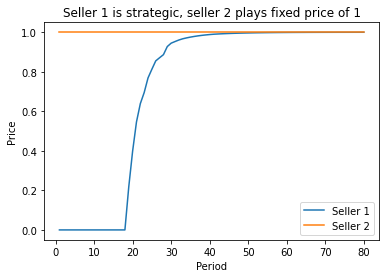

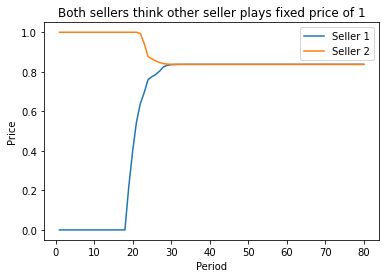

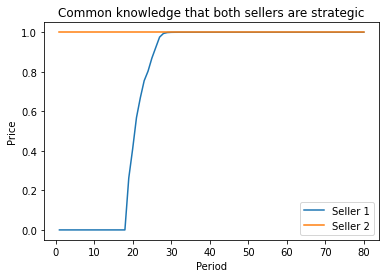

In [12]:
interp_policy_function_fixed = interp1d(s_list,
                         res_fixed['policy_function'],
                         kind='linear', fill_value='extrapolate')

interp_policy_function_strat = interp1d(s_list,
                         res_strat['policy_function'],
                         kind='linear', fill_value='extrapolate')

transcript = simulate_mw_bertrand(policy_function1=interp_policy_function_fixed,
                                  policy_function2=outside_policy,
                                  eta=Eta,
                                  rounds=80)
plot_price_dev(transcript['time'],transcript['price1'],transcript['price2'],title='Seller 1 is strategic, seller 2 plays fixed price of 1')


transcript = simulate_mw_bertrand(policy_function1=interp_policy_function_fixed,
                                  policy_function2=interp_policy_function_fixed,
                                  eta=Eta,
                                  rounds=80)
plot_price_dev(transcript['time'],transcript['price1'],transcript['price2'],title='Both sellers think other seller plays fixed price of 1')


transcript = simulate_mw_bertrand(policy_function1=interp_policy_function_strat,
                                  policy_function2=interp_policy_function_strat,
                                  eta=Eta,
                                  rounds=80)
plot_price_dev(transcript['time'],transcript['price1'],transcript['price2'],title='Common knowledge that both sellers are strategic')

## Strategic setting